# Graphiques Servis au moins 1 fois


In [1]:
%run layeringOfServices.ipynb

OperationalError: (pymysql.err.OperationalError) (2013, 'Lost connection to MySQL server during query ([WinError 10053] An established connection was aborted by the software in your host machine)')
[SQL: 
SELECT 
    dm.id_patient AS main_id,
    IF(TIMESTAMPDIFF(YEAR,
            dsd.nan_ki_dat_ou_fet,
            NOW()) >= 18,
        IF(dsd.a7_Ak_kiles_w_ap_viv_15_19 = '3'
                OR dsd.a1121_aktivite_pouw_rantre_kob_ou_vle_fe = '0'
                or dsd.c6b_Kiles_ki_peye_lekol_ou_Tranche_15_19 = '3'
                or dsd.eske_ou_bay_kob_pou_pran_swen_piti_ou_ayo = 'oui',
            'yes_sup18',
            'no18'),
        if(
			dsd.a7_ak_kils_w_ap_viv_10_14 = '6'
            OR dsd.a1121_aktivite_pouw_rantre_kob_ou_vle_fe = '0'
            OR dsd.c6b_kils_ki_peye_lekl_ou_10_14 = '5'
            or dsd.eske_ou_bay_kob_pou_pran_swen_piti_ou_ayo = 'oui',
            'yes_inf17'
            ,'no17'	)
		) AS muso_eligibility,
    dm.id_group AS actual_id_group,
    b.groups AS group_she_take_sessions,
    p.patient_code AS code,
    ben.last_name,
    ben.first_name,
    ben.dob,
    TIMESTAMPDIFF(YEAR, ben.dob, NOW()) AS age,
    b.pres AS number_of_different_topic,
    b.first_session_date,
    b.last_session_date,
    MAX(dhi.test_date) AS last_hiv_test_date,
    GROUP_CONCAT(DISTINCT dhi.test_result, ',') AS test_results,
    GROUP_CONCAT(DISTINCT ltlr.name, ',') AS test_results_with_label,
    MAX(dhi.condoms_reception_date) AS last_condoms_reception_date,
    group_concat(distinct dhi.has_been_sensibilize_for_condom, ',') as sensibilisation_condom,
    group_concat(distinct dhi.accept_condom, ',') as acceptation_condom,
    MAX(dhi.vbg_treatment_date) AS last_vbg_treatment_date,
    MAX(dhi.gynecological_care_date) AS last_gynecological_care_date,
    MAX(dhi.prep_awareness_date) AS last_sensibilisation_prep,
    MAX(dhi.prep_reference_date) AS last_reference_date_prep,
    MAX(dhi.prep_initiation_date) AS last_initiation_date_prep,
    GROUP_CONCAT(distinct dhi.prep_acceptation, ',') AS acceptation_prep,
    dg.name AS actual_group_name,
    dh.name AS actual_hub,
    lc.name AS actual_commune,
    dh.commune AS actual_commune_id,
    ld.name AS actual_departement,
    lc.departement AS actual_departement_id,
    IF(mgm.id_patient IS NOT NULL,
        'yes',
        'no') AS is_muso,
    IF(gb.case_id IS NOT NULL, 'yes', 'no') AS is_gardening,
    tf.*,
    dsd.*
FROM
    dream_member dm
        LEFT JOIN
    (SELECT 
        SUM(a.value = 'P') AS pres,
            a.id_patient,
            GROUP_CONCAT(DISTINCT a.id_group, ',') AS groups,
            MIN(a.date) AS first_session_date,
            MAX(a.date) AS last_session_date
    FROM
        (SELECT 
        dga.*, dgs.topic, dgs.date, dgs.id_group
    FROM
        dream_group_attendance dga
    LEFT JOIN dream_group_session dgs ON dgs.id = dga.id_group_session
    WHERE
        dga.value = 'P'
    GROUP BY dga.id_patient , dgs.topic) a
    GROUP BY a.id_patient) b ON b.id_patient = dm.id_patient
        LEFT JOIN
    beneficiary ben ON ben.id_patient = dm.id_patient
        LEFT JOIN
    patient p ON p.id = dm.id_patient
        LEFT JOIN
    caris_db.dream_hivinfos dhi ON dhi.id_patient = dm.id_patient
        LEFT JOIN
    lookup_testing_lab_result ltlr ON ltlr.id = dhi.test_result
        LEFT JOIN
    caris_db.dream_group dg ON dg.id = dm.id_group
        LEFT JOIN
    dream_hub dh ON dh.id = dg.id_dream_hub
        LEFT JOIN
    lookup_commune lc ON lc.id = dh.commune
        LEFT JOIN
    lookup_departement ld ON ld.id = lc.departement
        LEFT JOIN
    dreams_surveys_data dsd ON dsd.case_id = dm.case_id
        LEFT JOIN
    tracking_familymember tf ON tf.id_patient = dm.id_patient
        LEFT JOIN
    muso_group_members mgm ON mgm.id_patient = dm.id_patient
        LEFT JOIN
    gardening_beneficiary gb ON gb.code_dreams = p.patient_code
GROUP BY dm.id_patient
]
(Background on this error at: http://sqlalche.me/e/14/e3q8)

OperationalError: (pymysql.err.OperationalError) (2013, 'Lost connection to MySQL server during query ([WinError 10053] An established connection was aborted by the software in your host machine)')
[SQL: 
SELECT 
    dm.id_patient AS main_id,
    IF(TIMESTAMPDIFF(YEAR,
            dsd.nan_ki_dat_ou_fet,
            NOW()) >= 18,
        IF(dsd.a7_Ak_kiles_w_ap_viv_15_19 = '3'
                OR dsd.a1121_aktivite_pouw_rantre_kob_ou_vle_fe = '0'
                or dsd.c6b_Kiles_ki_peye_lekol_ou_Tranche_15_19 = '3'
                or dsd.eske_ou_bay_kob_pou_pran_swen_piti_ou_ayo = 'oui',
            'yes_sup18',
            'no18'),
        if(
			dsd.a7_ak_kils_w_ap_viv_10_14 = '6'
            OR dsd.a1121_aktivite_pouw_rantre_kob_ou_vle_fe = '0'
            OR dsd.c6b_kils_ki_peye_lekl_ou_10_14 = '5'
            or dsd.eske_ou_bay_kob_pou_pran_swen_piti_ou_ayo = 'oui',
            'yes_inf17'
            ,'no17'	)
		) AS muso_eligibility,
    dm.id_group AS actual_id_group,
    b.groups AS group_she_take_sessions,
    p.patient_code AS code,
    ben.last_name,
    ben.first_name,
    ben.dob,
    TIMESTAMPDIFF(YEAR, ben.dob, NOW()) AS age,
    b.pres AS number_of_different_topic,
    b.first_session_date,
    b.last_session_date,
    MAX(dhi.test_date) AS last_hiv_test_date,
    GROUP_CONCAT(DISTINCT dhi.test_result, ',') AS test_results,
    GROUP_CONCAT(DISTINCT ltlr.name, ',') AS test_results_with_label,
    MAX(dhi.condoms_reception_date) AS last_condoms_reception_date,
    group_concat(distinct dhi.has_been_sensibilize_for_condom, ',') as sensibilisation_condom,
    group_concat(distinct dhi.accept_condom, ',') as acceptation_condom,
    MAX(dhi.vbg_treatment_date) AS last_vbg_treatment_date,
    MAX(dhi.gynecological_care_date) AS last_gynecological_care_date,
    MAX(dhi.prep_awareness_date) AS last_sensibilisation_prep,
    MAX(dhi.prep_reference_date) AS last_reference_date_prep,
    MAX(dhi.prep_initiation_date) AS last_initiation_date_prep,
    GROUP_CONCAT(distinct dhi.prep_acceptation, ',') AS acceptation_prep,
    dg.name AS actual_group_name,
    dh.name AS actual_hub,
    lc.name AS actual_commune,
    dh.commune AS actual_commune_id,
    ld.name AS actual_departement,
    lc.departement AS actual_departement_id,
    IF(mgm.id_patient IS NOT NULL,
        'yes',
        'no') AS is_muso,
    IF(gb.case_id IS NOT NULL, 'yes', 'no') AS is_gardening,
    tf.*,
    dsd.*
FROM
    dream_member dm
        LEFT JOIN
    (SELECT 
        SUM(a.value = 'P') AS pres,
            a.id_patient,
            GROUP_CONCAT(DISTINCT a.id_group, ',') AS groups,
            MIN(a.date) AS first_session_date,
            MAX(a.date) AS last_session_date
    FROM
        (SELECT 
        dga.*, dgs.topic, dgs.date, dgs.id_group
    FROM
        dream_group_attendance dga
    LEFT JOIN dream_group_session dgs ON dgs.id = dga.id_group_session
    WHERE
        dga.value = 'P'
    GROUP BY dga.id_patient , dgs.topic) a
    GROUP BY a.id_patient) b ON b.id_patient = dm.id_patient
        LEFT JOIN
    beneficiary ben ON ben.id_patient = dm.id_patient
        LEFT JOIN
    patient p ON p.id = dm.id_patient
        LEFT JOIN
    caris_db.dream_hivinfos dhi ON dhi.id_patient = dm.id_patient
        LEFT JOIN
    lookup_testing_lab_result ltlr ON ltlr.id = dhi.test_result
        LEFT JOIN
    caris_db.dream_group dg ON dg.id = dm.id_group
        LEFT JOIN
    dream_hub dh ON dh.id = dg.id_dream_hub
        LEFT JOIN
    lookup_commune lc ON lc.id = dh.commune
        LEFT JOIN
    lookup_departement ld ON ld.id = lc.departement
        LEFT JOIN
    dreams_surveys_data dsd ON dsd.case_id = dm.case_id
        LEFT JOIN
    tracking_familymember tf ON tf.id_patient = dm.id_patient
        LEFT JOIN
    muso_group_members mgm ON mgm.id_patient = dm.id_patient
        LEFT JOIN
    gardening_beneficiary gb ON gb.code_dreams = p.patient_code
GROUP BY dm.id_patient
]
(Background on this error at: http://sqlalche.me/e/14/e3q8)

In [ ]:
one_services = dreams_mastersheet[(dreams_mastersheet.age_range !="not_valid_age") & (dreams_mastersheet.age_range != "25-29") & (dreams_mastersheet.fiscal_year != "Q3fy20-Q4fy20") & (dreams_mastersheet.recevoir_1services != "no")  ]

In [ ]:
one_services.code.count()

4021

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [ ]:
pivot_one = one_services.pivot_table(columns="fiscal_year",values="code",fill_value=0,aggfunc='count')

In [ ]:
pivot_one.columns

Index(['FY21Q1', 'FY21Q2', 'FY21Q3', 'FY21Q4'], dtype='object', name='fiscal_year')

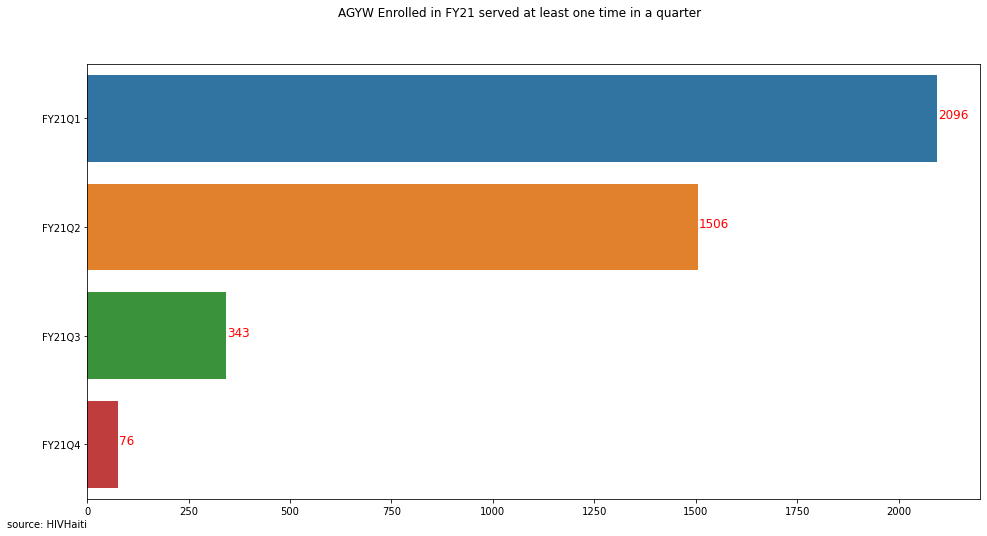

In [ ]:
X= list(pivot_one.columns)
Y= pivot_one.values.tolist()[0]
data = []
colonnes = []

for x,y in zip(X,Y):
    data.append(y)
    colonnes.append(x)


df = pd.DataFrame({"fy":colonnes, "dt":data})

plt.subplots(figsize=(16,8))
splot = sns.barplot(x="dt",y="fy",data=df)
splot.set_xlabel("")
splot.set_ylabel("")
plt.suptitle("AGYW Enrolled in FY21 served at least one time in a quarter")
for p in splot.patches:
    width = p.get_width()
    plt.text(2+p.get_width(), p.get_y()+0.50*p.get_height(),
             '{:1.0f}'.format(width),fontdict=dict(color="red",fontsize=12))
    
plt.annotate(
    "source: HIVHaiti",(0,0), (-80,-20), fontsize=10, 
             xycoords='axes fraction', textcoords='offset points', va='top'
)
plt.savefig("dreams_served_atleast1services",dpi=400)
 